In [1]:
# Setup the library
import pyrogue as pr
import os, sys
import matplotlib.pyplot as plt
import time
import numpy as np
import math

top_level=f'{os.getcwd()}/../../'
pr.addLibraryPath( f'{top_level}/scripts' )
import setupLibPaths
import epix_hr_single_10k
import ePixViewer.Cameras as cameras


In [2]:
from importlib import reload
reload(cameras)

MAX_NUMBER_OF_FRAMES_PER_BATCH  = 1000
cameraType            = 'ePixHr10kTBatcher'
bitMask               = 0xffff
currentCam = cameras.Camera(cameraType = cameraType)
currentCam.bitMask = bitMask
currentCam.MAX_NUMBER_OF_FRAMES_PER_BATCH  = MAX_NUMBER_OF_FRAMES_PER_BATCH

initSequence = 4


Camera  ePixHr10kTBatcher  selected.


# Helper functions

In [19]:
def read_asic_test(numBatches = 10):
    print(filename)
    ########################################################################################################################3
    f = open(filename, mode = 'rb')
    imgDesc = []
    for i in range(numBatches):
        print("Starting to get data set %d" % (i))
        allFrames = currentCam.getData(f,8)
        imgDesc2 = currentCam.getDescImaData(allFrames[:,:-8])
        if i == 0:
            headers = allFrames[:,0:6]
            imgDesc = imgDesc2
        if i == 1: #skips the first dataset
            headers = allFrames[:,0:6]
            imgDesc = imgDesc2
        else:
            headers = np.concatenate((headers, allFrames[:,0:6]),0)
            imgDesc = np.concatenate((imgDesc, imgDesc2),0)
        if allFrames.shape[0] != MAX_NUMBER_OF_FRAMES_PER_BATCH:
            break


    numberOfFrames = allFrames.shape[0]
    print(allFrames.shape)
    ###########################################################################################################################
    return imgDesc, headers


In [4]:
def noise_print(offset = 0, width = 384):
    print(imgDesc[100].shape)
    imgDescLoc = imgDesc[:,:,offset:offset+width]
    hg_n  = imgDescLoc.astype('float64')
    hg_n -= np.median(hg_n, axis=0, keepdims=True)
    hg_n -= np.median(hg_n, axis=(1,2), keepdims=True)
    #hg_n -= np.median(hg_n, axis=2, keepdims=True) # rows (cols)
    #hg_n -= np.median(hg_n, axis=1, keepdims=True) # cols (rows)
    imgDescCMC = hg_n
    
    darkAvg  = np.mean(imgDescLoc,0)
    noiseMap = np.std(imgDescLoc,0)
    medianNoise = np.median(noiseMap)
    #noiseMap[noiseMap>medianNoise*4]=0
    
    darkAvgCMC  = np.mean(imgDescCMC,0)
    noiseMapCMC = np.std(imgDescCMC,0)
    medianNoiseCMC = np.median(noiseMapCMC)
    noiseMapCMC[noiseMapCMC>medianNoiseCMC*5]=0
    
    plt.figure(1,figsize=(12,8),dpi=150)
    plt.imshow(noiseMap, cmap='gray', vmin=-10, vmax=50)
    plt.colorbar(location='right', anchor=(0, 0.3), shrink=0.7)

    plt.figure(2,figsize=(12,8),dpi=150)
    dataset = noiseMap
    plt.hist(dataset.reshape(-1), bins=100, label=f'\nNoise Map distribution AHL, Avg. Dark level %d, Mediam Noise %d' % (np.mean(np.mean(darkAvg)), medianNoise)) 
    dataset = noiseMapCMC
    plt.hist(dataset.reshape(-1), bins=100, label=f'\nNoise Map distribution AHL, Avg. Dark level %d, Mediam Noise %d' % (np.mean(np.mean(darkAvgCMC)), medianNoiseCMC)) 
    plt.yscale('log')
    plt.title("histogram") 
    plt.legend()
    plt.show()
          
    plt.figure(3,figsize=(12,8),dpi=150)
    print(imgDesc.shape)
    dataset = imgDesc[:,:,offset:offset+192]
    print(dataset.shape)
    plt.plot(dataset[:,10,:]) 
    #plt.legend()
    
    plt.figure(4,figsize=(12,8),dpi=150)
    print(imgDesc.shape)
    dataset = imgDesc[:,:,offset:offset+192]
    print(dataset.shape)
    plt.plot(dataset[:,10,86])
    #plt.legend()
    
    return noiseMap, darkAvg

# Pixel Optimization

/u3/ddoering/ePixHR10kTLCLSIITiming_ASICV4_CarrierWithASICs1_2_Asic1_dark_320MHz_AHL_bias_100V_run2.dat
Starting to get data set 0
Read 1000 frames
numberOfFrames in the 3D array:  1000
Starting descrambling images
Starting to get data set 1
Read 1000 frames
numberOfFrames in the 3D array:  1000
Starting descrambling images
Starting to get data set 2
Read 1000 frames
numberOfFrames in the 3D array:  1000
Starting descrambling images
Starting to get data set 3
Read 1000 frames
numberOfFrames in the 3D array:  1000
Starting descrambling images
(1000, 56072)
(145, 384)


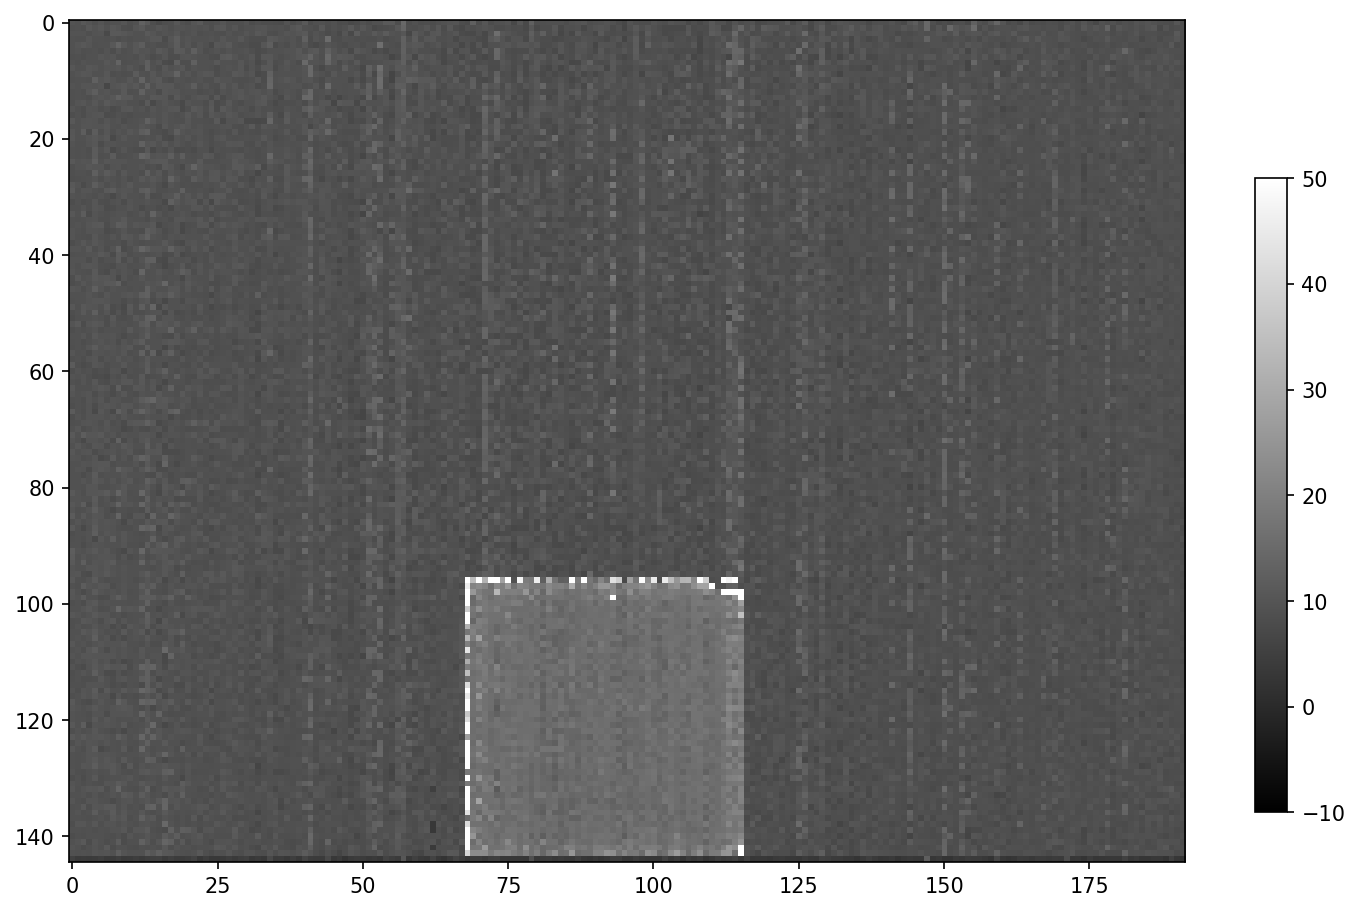

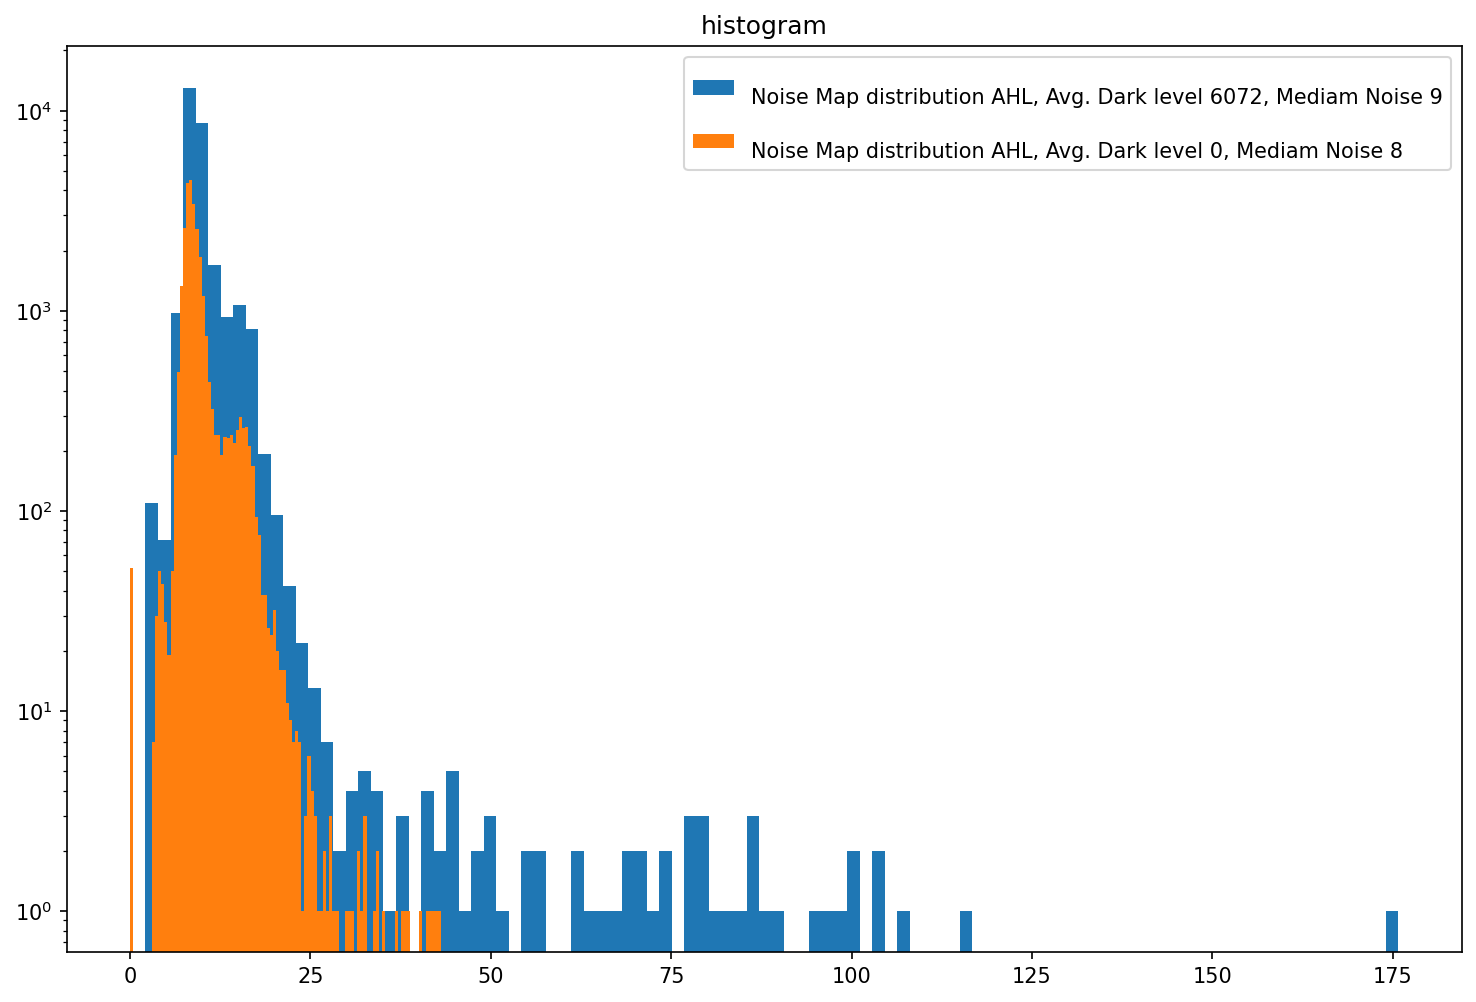

(1500, 145, 384)
(1500, 145, 192)
(1500, 145, 384)
(1500, 145, 192)


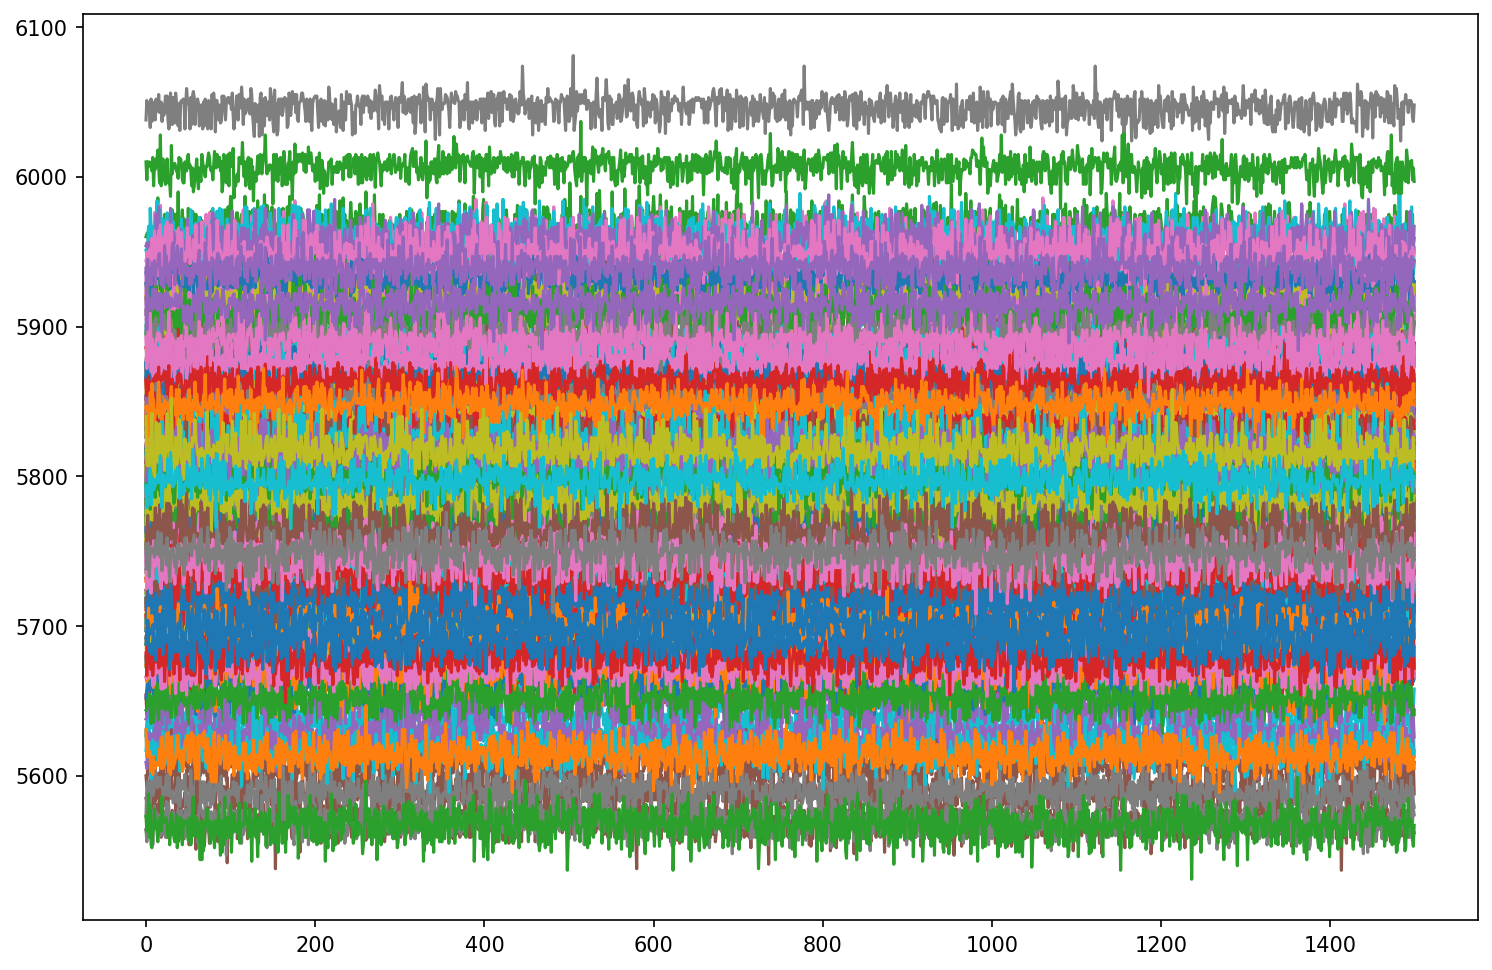

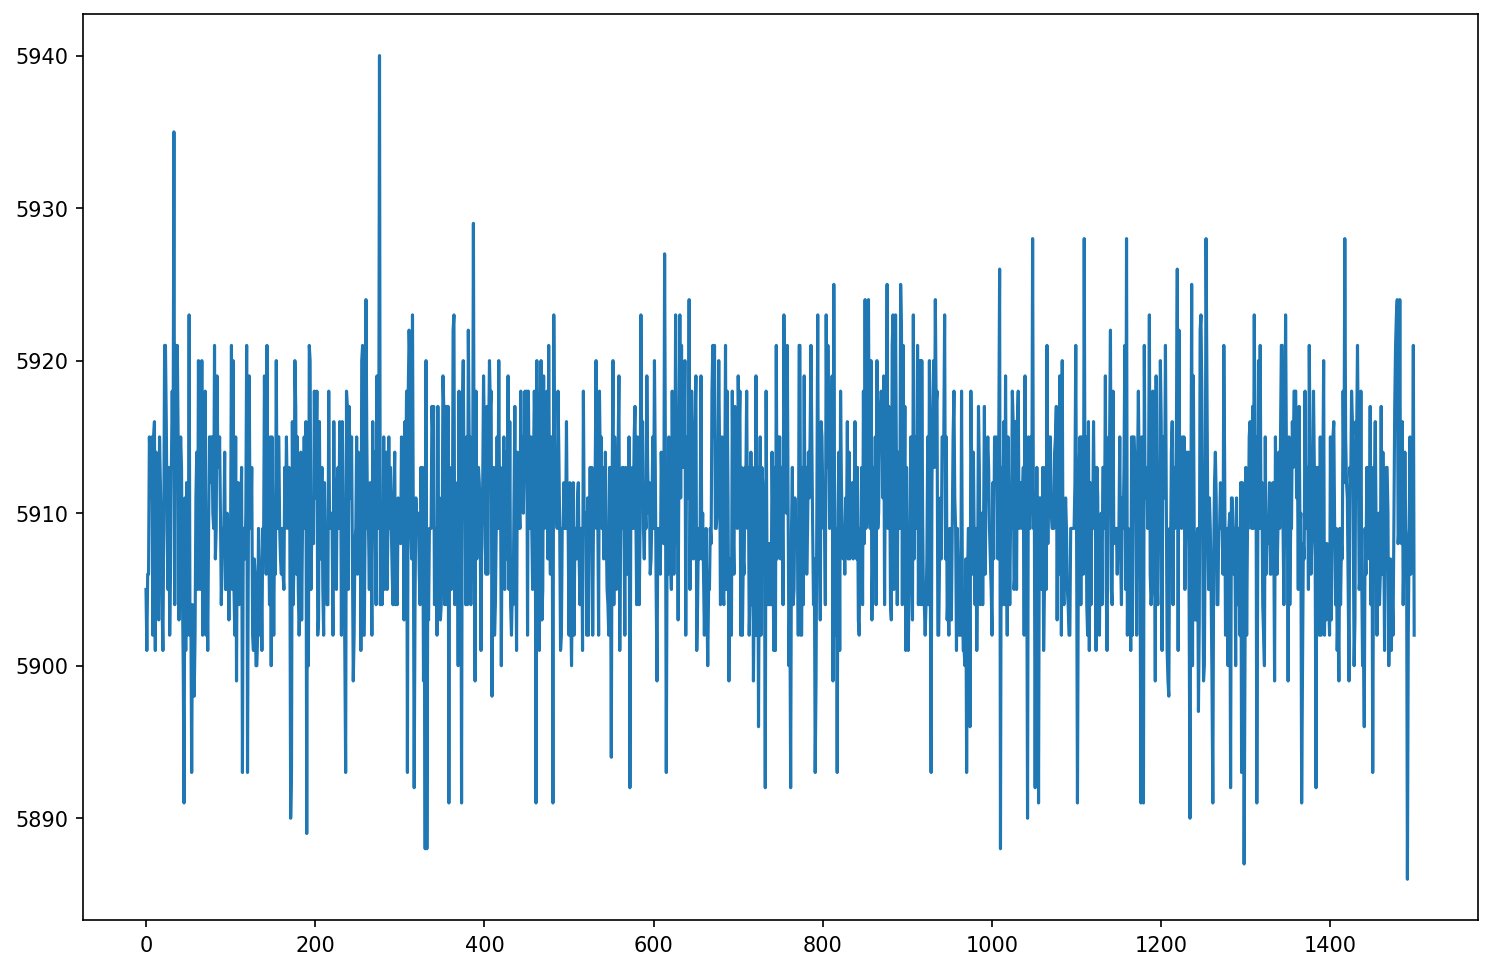

In [79]:
filename = (f'/u3/ddoering/ePixHR10kTLCLSIITiming_ASICV4_Cd_320MHz_AHL_run2.dat')
filename = (f'/u3/ddoering/ePixHR10kTLCLSIITiming_ASICV4_CarrierWithASICs1_2_Asic1_Cd_320MHz_AHL_bias_100V_run4.dat')
filename = (f'/u3/ddoering/ePixHR10kTLCLSIITiming_ASICV4_CarrierWithASICs1_2_Asic1_fe55_320MHz_AHL_bias_100V_run1.dat')
filename = (f'/u3/ddoering/ePixHR10kTLCLSIITiming_ASICV4_CarrierWithASICs1_2_Asic1_dark_320MHz_AHL_bias_100V_run2.dat')
imgDesc, headers = read_asic_test(numBatches = 4)
imgDesc1 = imgDesc[np.where(headers[:,1]==0)]
imgDesc2 = imgDesc[np.where(headers[:,1]!=0)]
imgDesc = imgDesc1
[noiseMap, darkAvg] = noise_print(0+192, 192+192)

(145, 384)


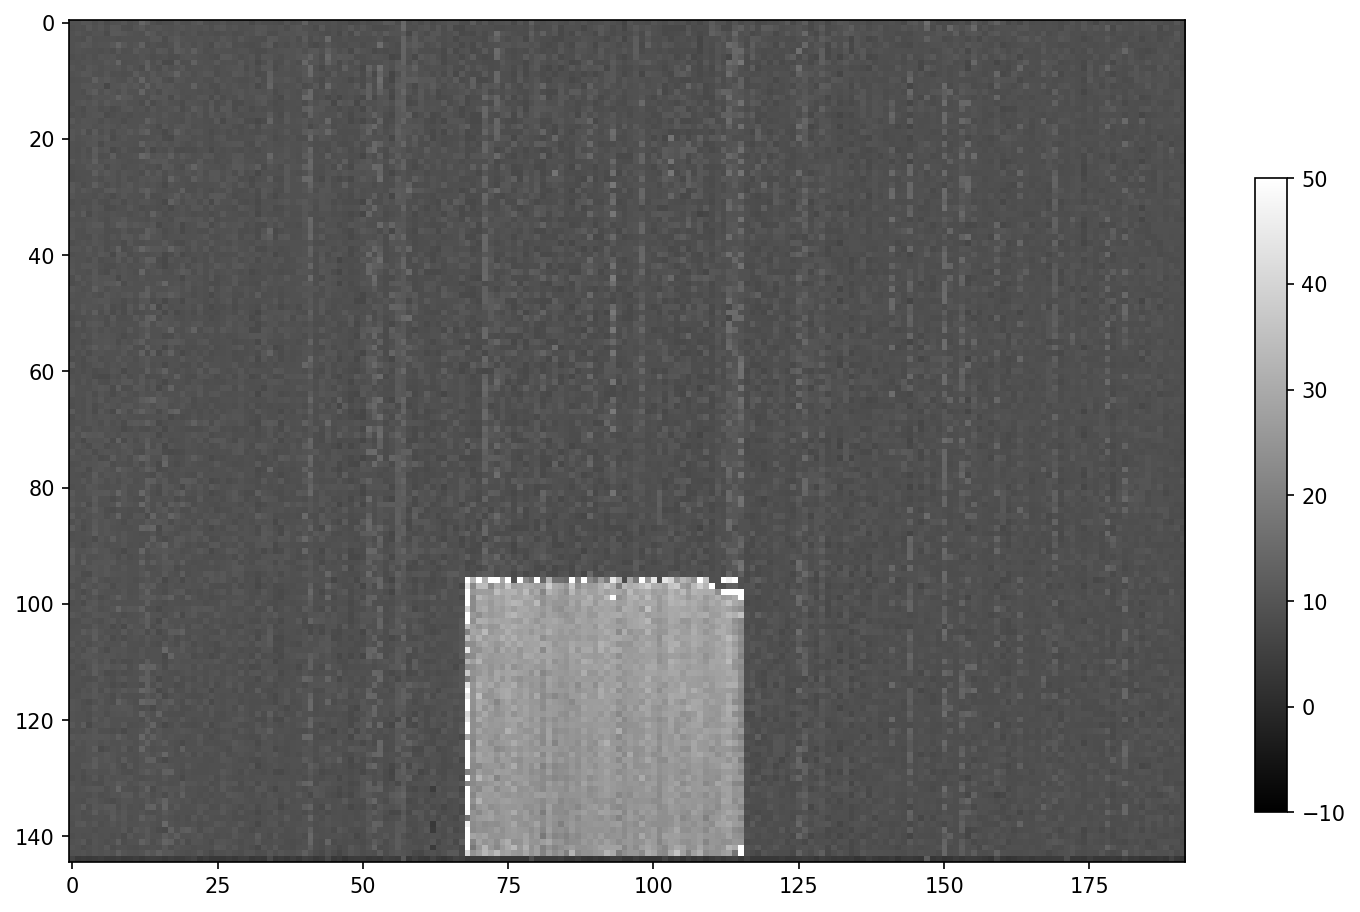

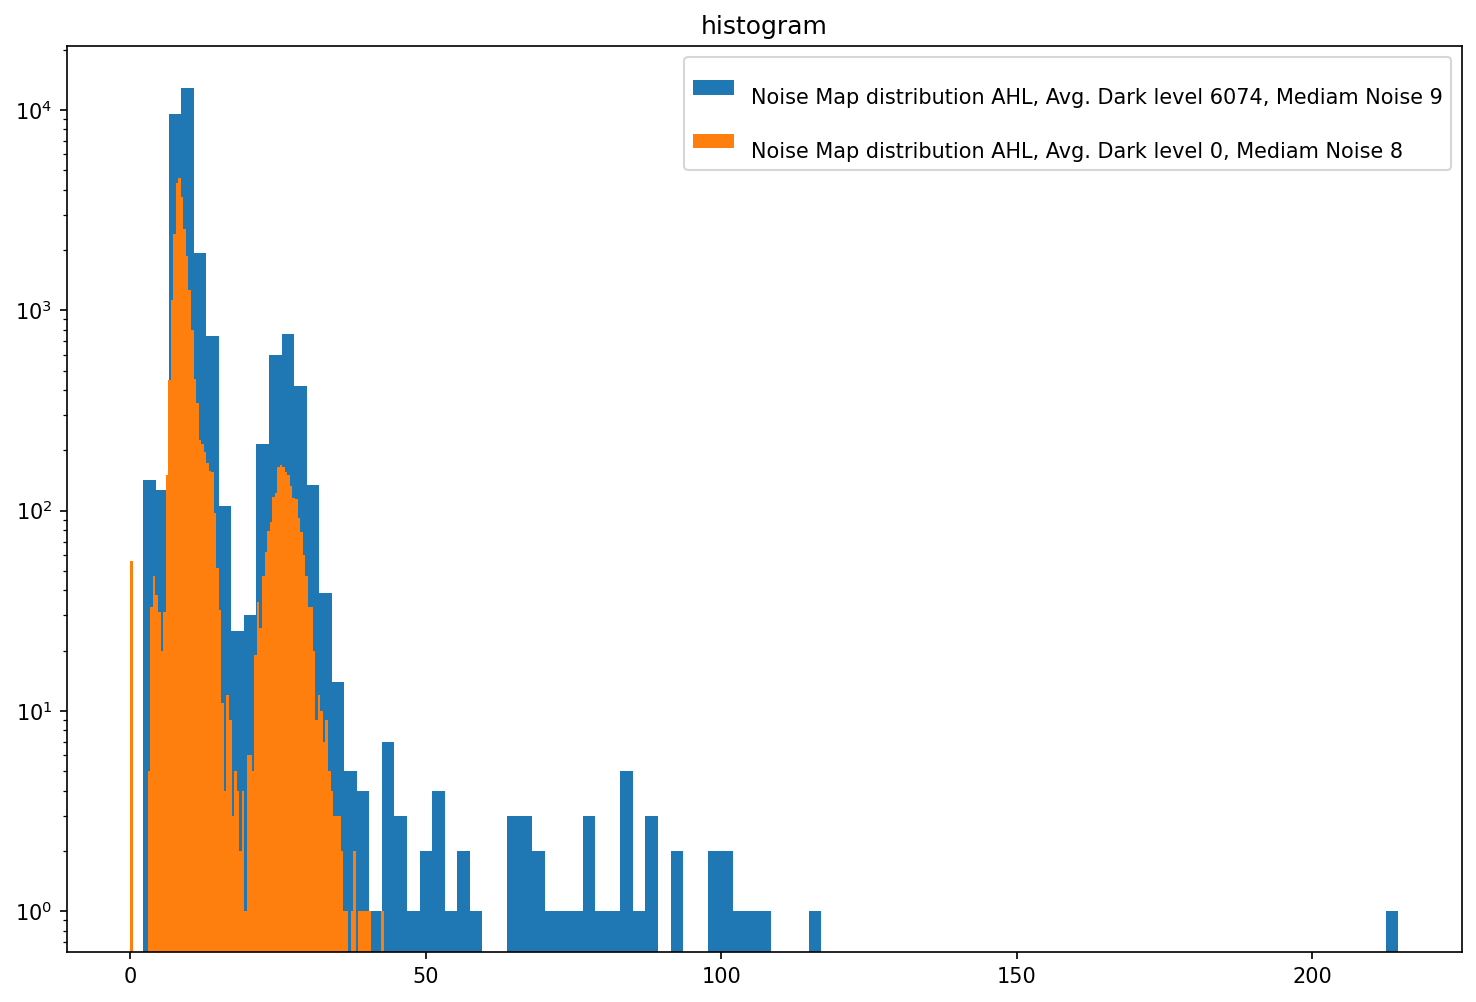

(19501, 145, 384)
(19501, 145, 192)
(19501, 145, 384)
(19501, 145, 192)


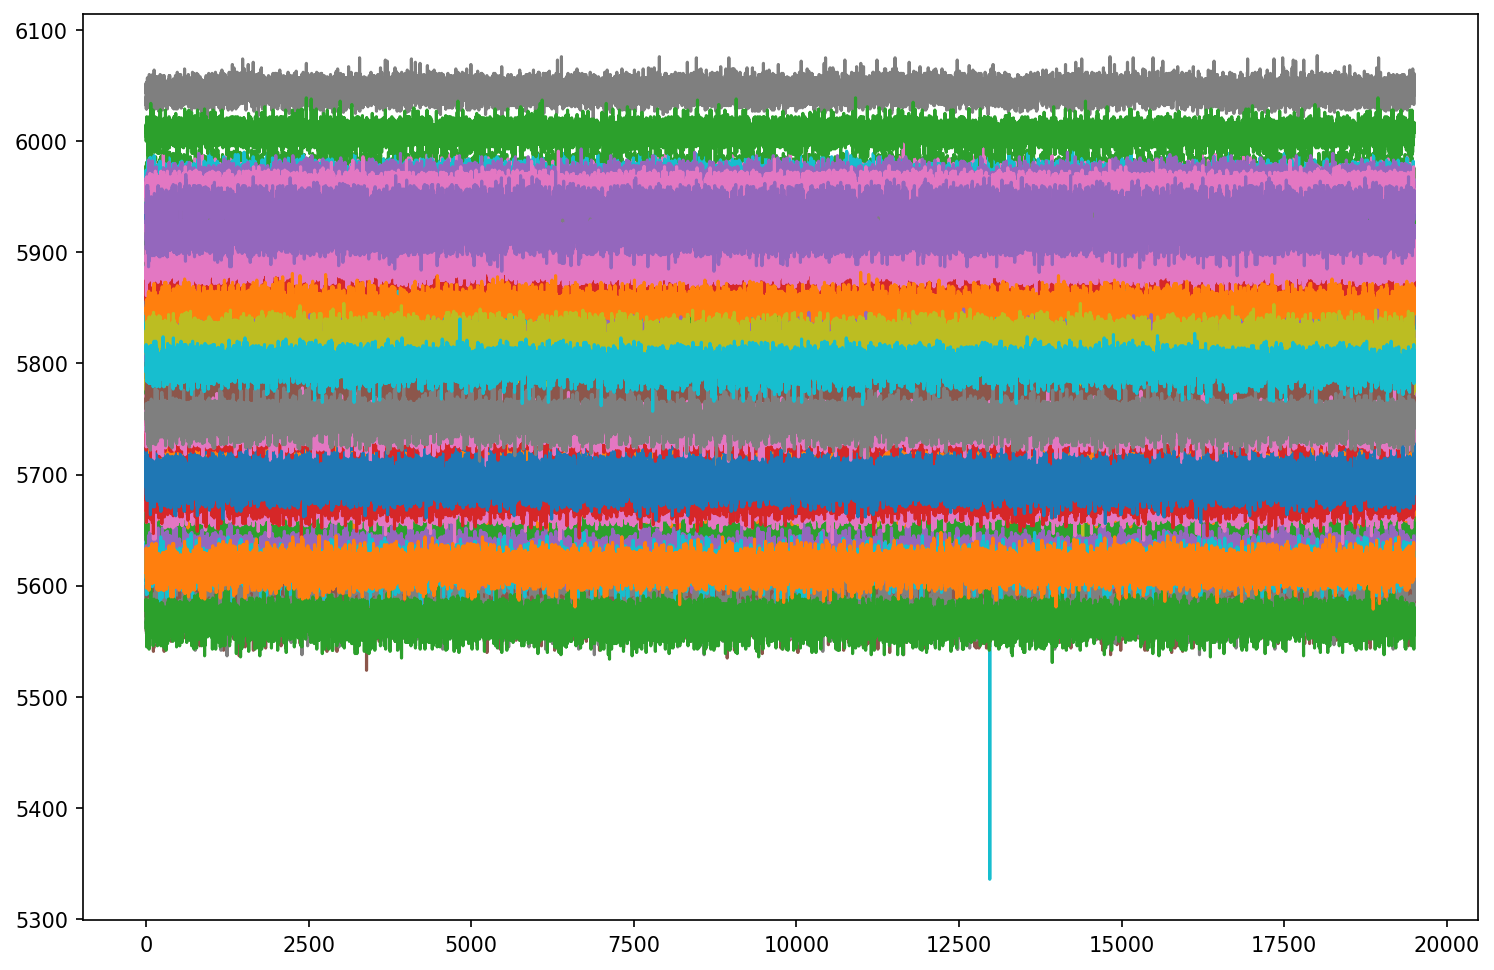

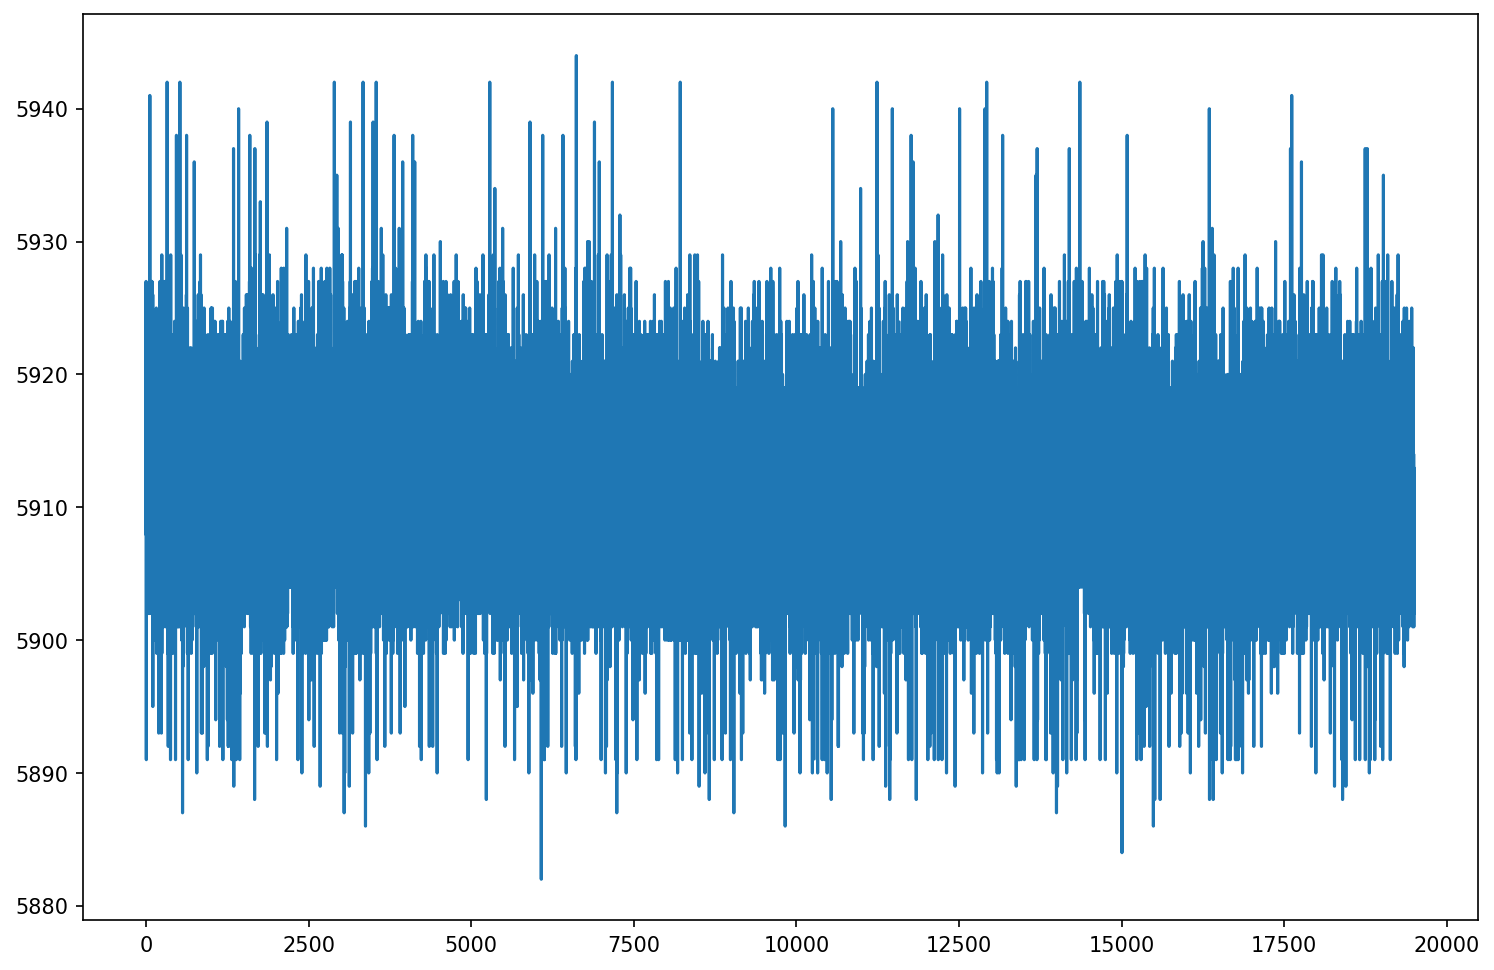

In [61]:
imgDesc = imgDesc1
[noiseMap, darkAvg] = noise_print(0+192, 192+192)


In [35]:
imgDesc1 = imgDesc[np.where(headers[0:10,1]==0)]

In [33]:
np.where(headers[0:10,1]==0)

(array([1, 3, 5, 6, 9]),)

In [25]:
headers[1]

array([0, 0, 0, 0, 0, 0], dtype=uint16)

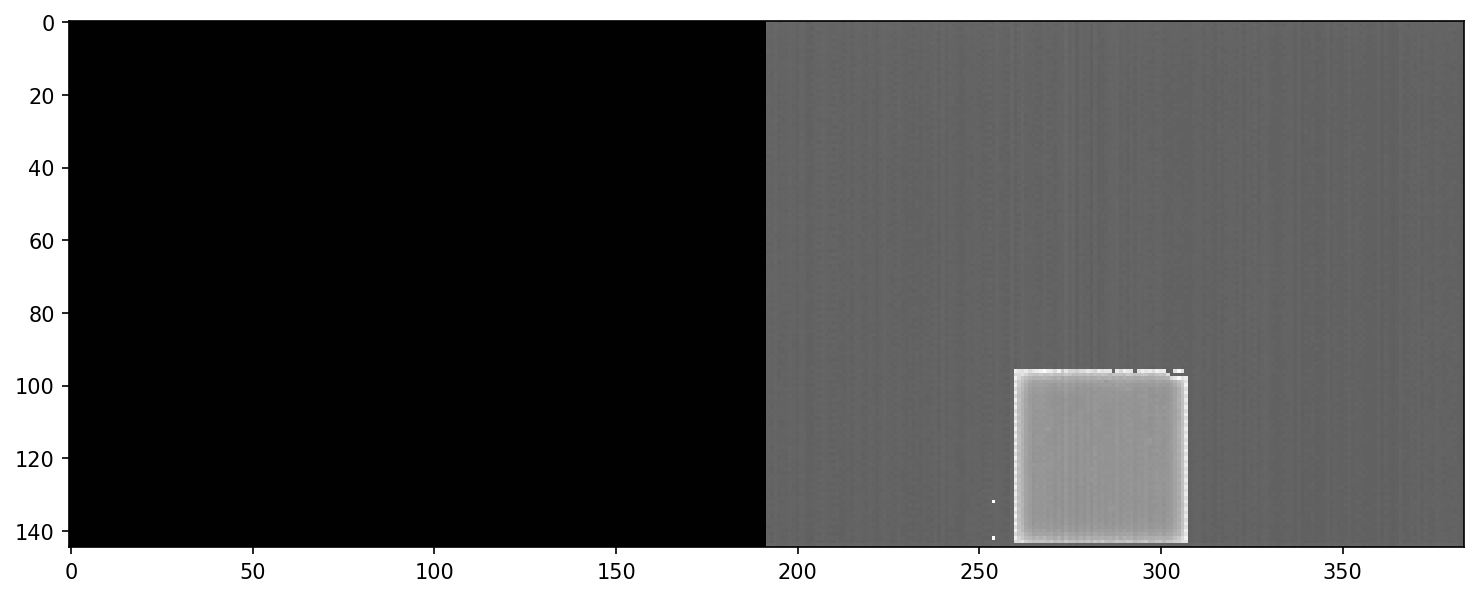

In [62]:
plt.figure(1,figsize=(12,8),dpi=150)
plt.imshow(imgDesc1[2,:,:], cmap='gray', vmin=-100, vmax=15000)
plt.show()

In [80]:
#np.save('/u3/ddoering/ePixHR10kTLCLSIITiming_ASICV4_Cd_320MHz_AHL_run2.dat', imgDesc)
np.save(filename, imgDesc)

In [81]:
imgDescRB = np.load(filename+'.npy')
print(filename+'.npy')

/u3/ddoering/ePixHR10kTLCLSIITiming_ASICV4_CarrierWithASICs1_2_Asic1_dark_320MHz_AHL_bias_100V_run2.dat.npy


In [82]:
imgDescRB.shape

(1500, 145, 384)

(145, 384)


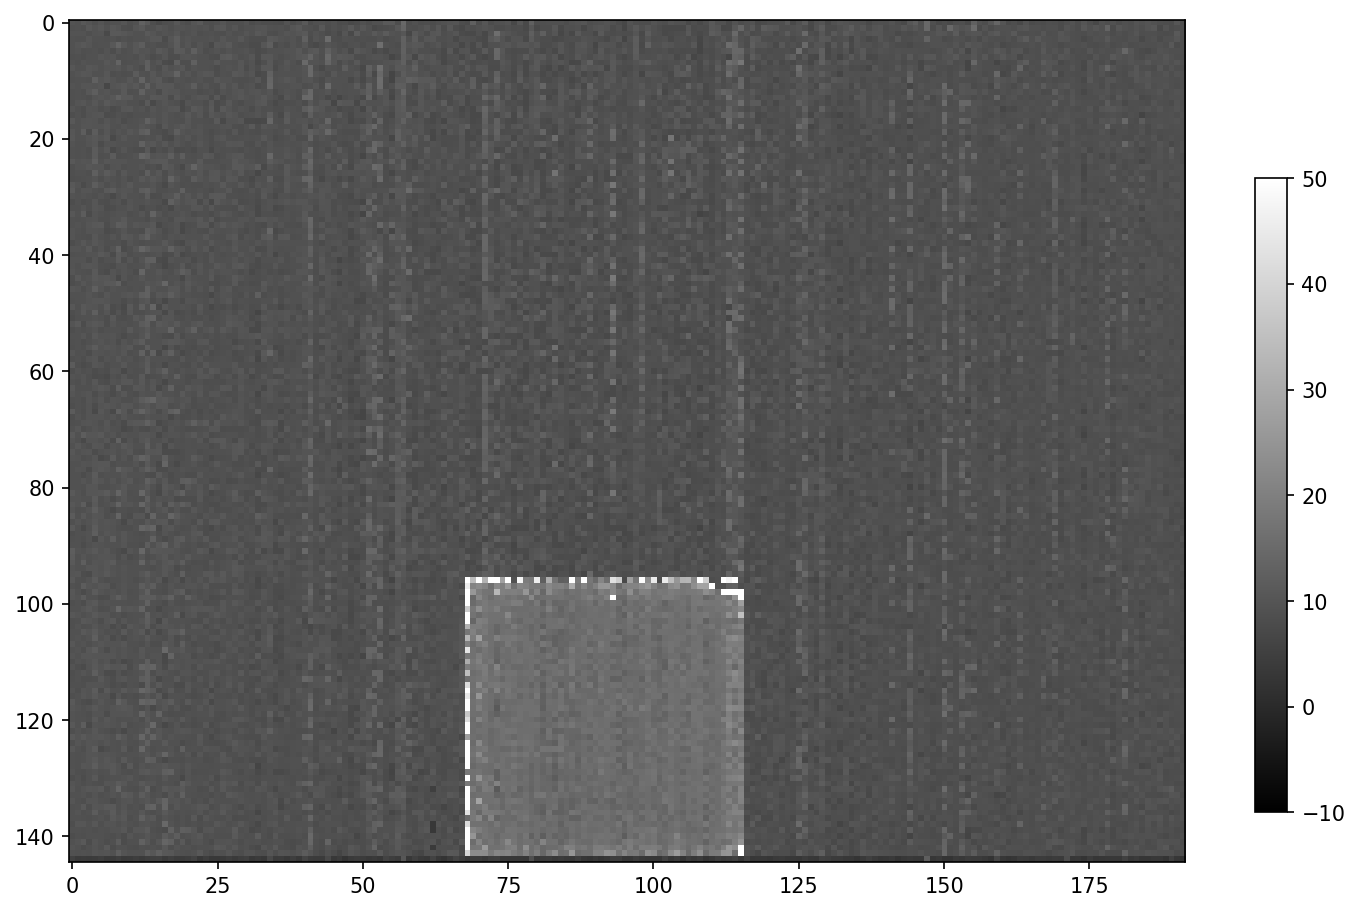

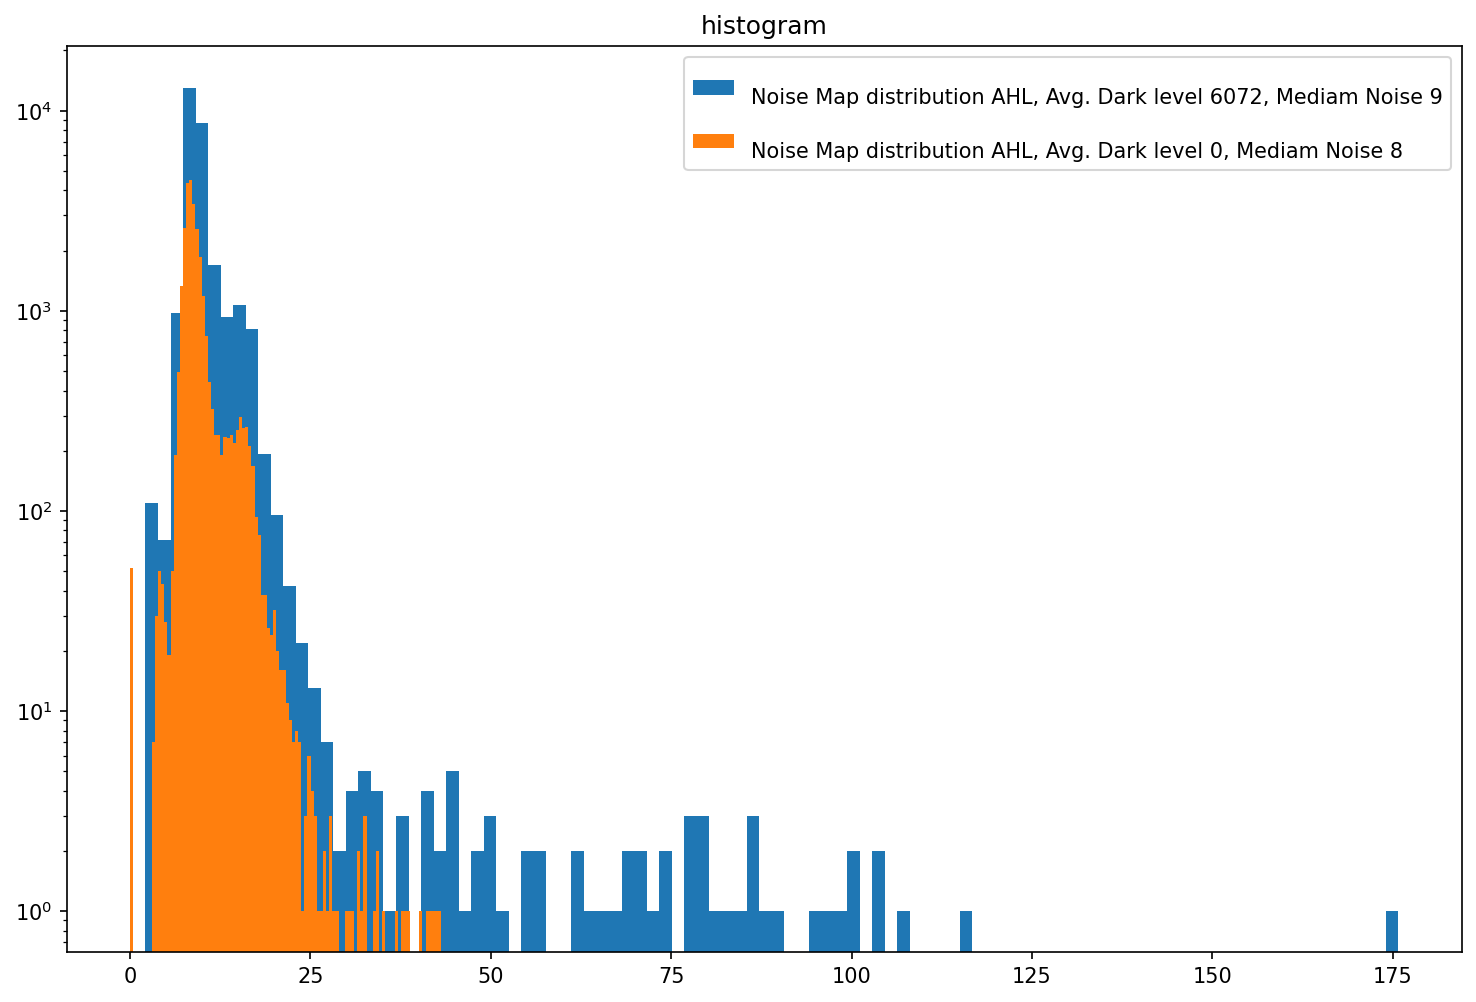

(1500, 145, 384)
(1500, 145, 192)
(1500, 145, 384)
(1500, 145, 192)


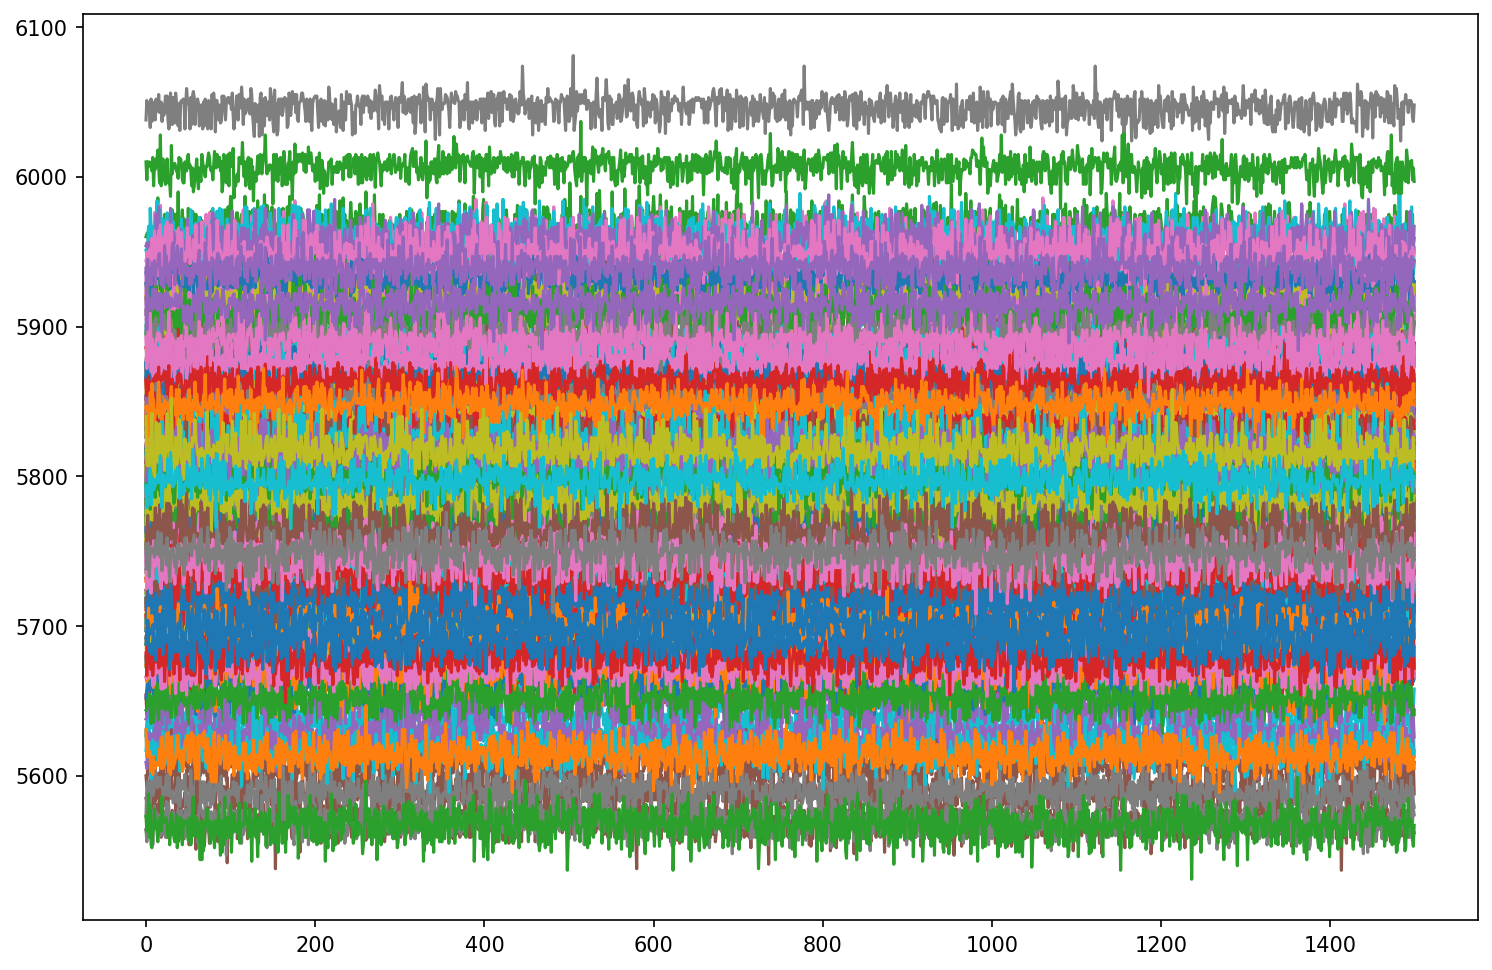

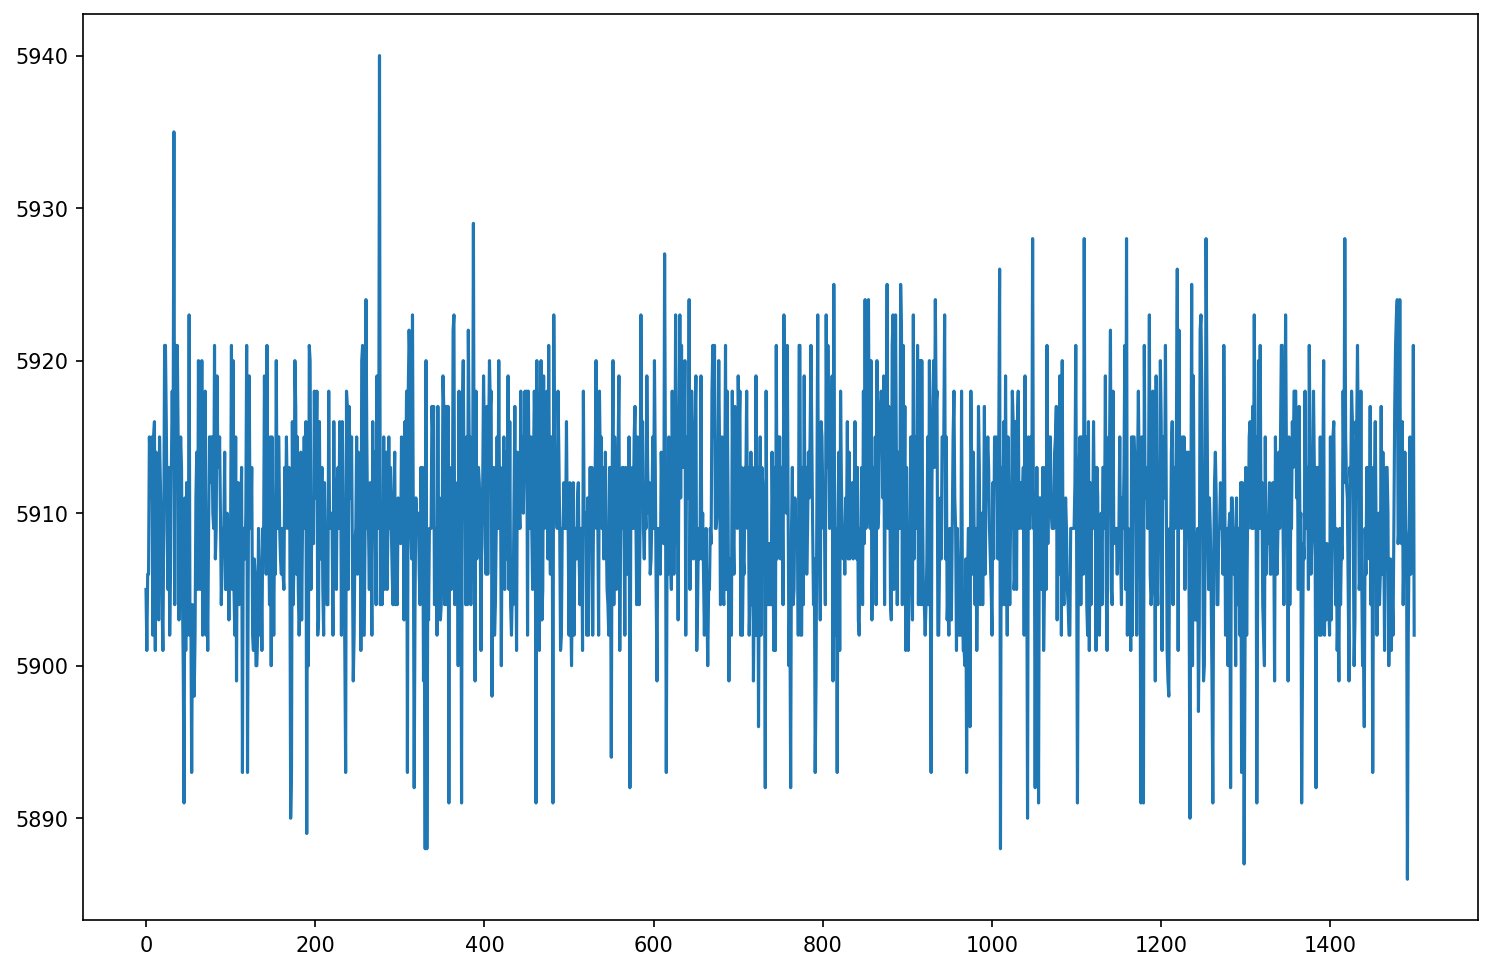

In [83]:
imgDesc = imgDescRB
[noiseMap, darkAvg] = noise_print(0+192, 192+192)

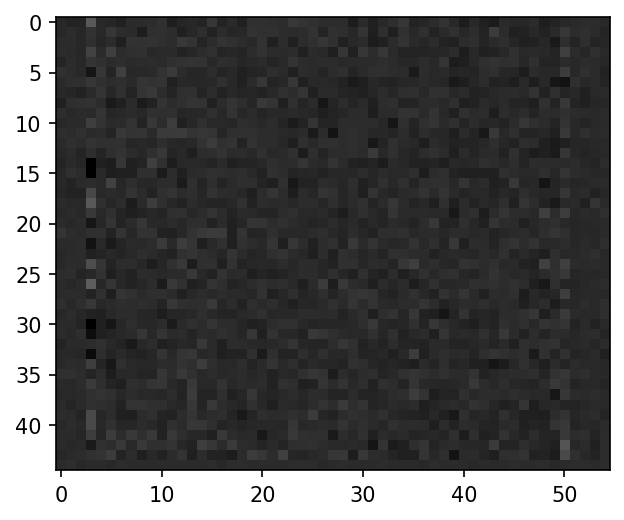

In [77]:
plt.figure(1,figsize=(6,4),dpi=150)
plt.imshow(imgDescRB[105,100:,192+65:192+120]-darkAvg[100:,65:120], cmap='gray', vmin=-100, vmax=500)
plt.show()

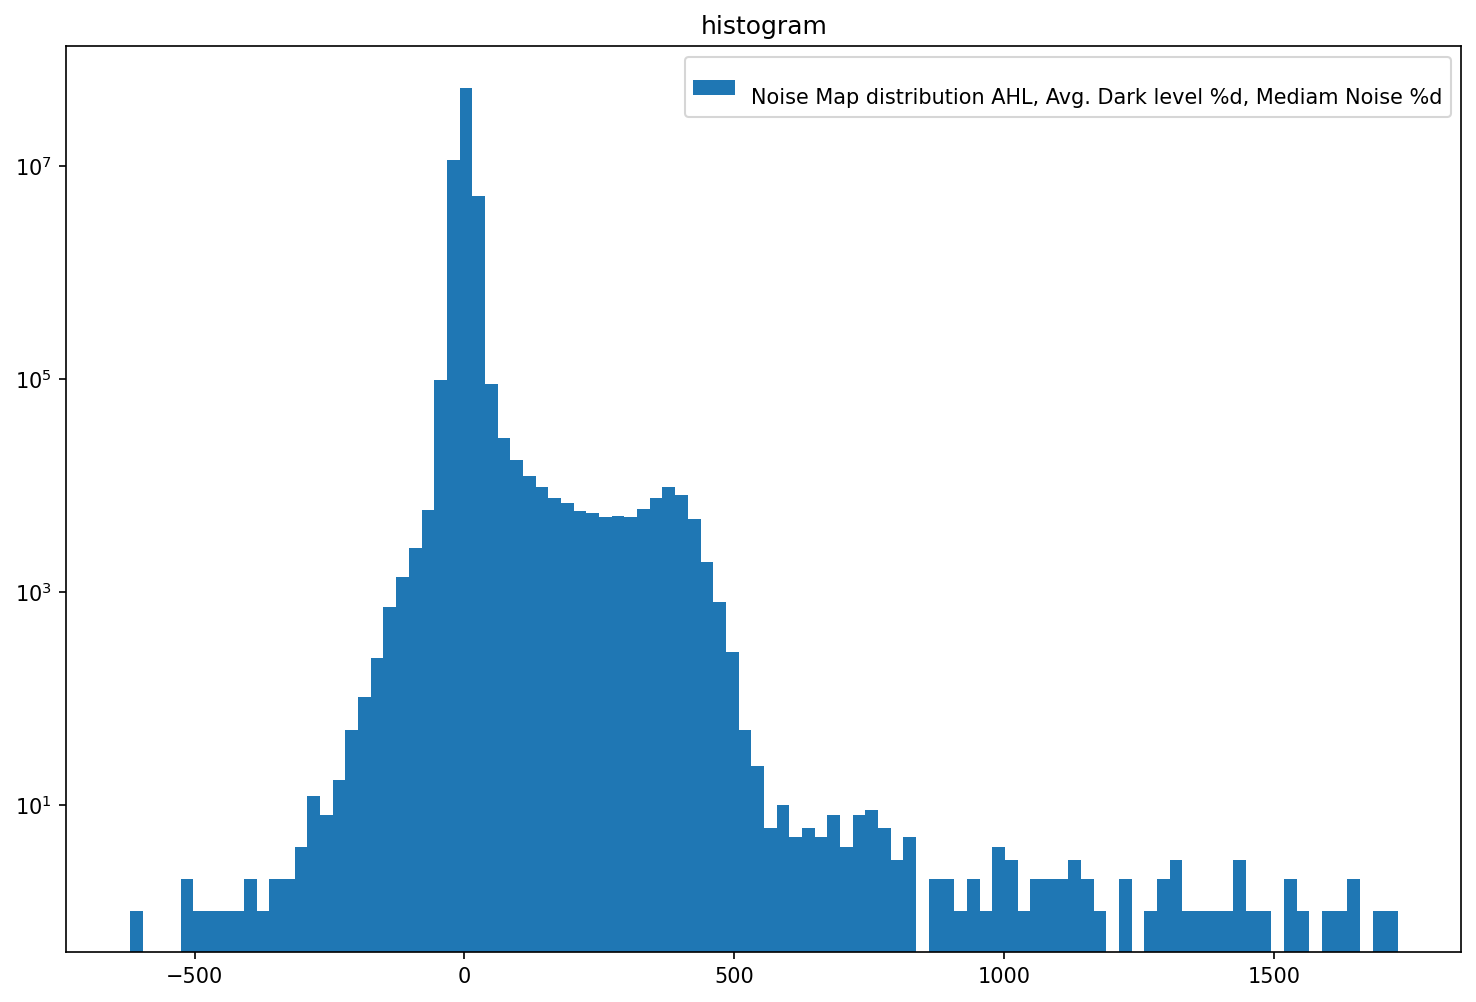

In [26]:
plt.figure(1,figsize=(12,8),dpi=150)
imgDescLoc = imgDesc[:,120:,60:120]
hg_n  = imgDescLoc.astype('float64')
hg_n -= np.median(hg_n, axis=0, keepdims=True)
hg_n -= np.median(hg_n, axis=(1,2), keepdims=True)
#hg_n -= np.median(hg_n, axis=2, keepdims=True) # rows (cols)
#hg_n -= np.median(hg_n, axis=1, keepdims=True) # cols (rows)
imgDescCMC = hg_n
dataset = imgDescCMC
plt.hist(dataset.reshape(-1), bins=100, label=f'\nNoise Map distribution AHL, Avg. Dark level %d, Mediam Noise %d')
plt.yscale('log')
plt.title("histogram") 
plt.legend()
plt.show()

In [ ]:
PreampList = [7, 6, 5, 4, 3, 2, 1, 0]
Vld1_b = 0
Pixel_CB= 7
Filter_DAC= 17
VRef_DAC = 58

for Preamp in PreampList:
   
    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V4_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV4_ASIC2_noise_320MHz_initSequence_%d_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (initSequence, Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = read_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print(0, 192)

In [ ]:
Preamp = 7
Vld1_bList = [0,1,2,3]
Pixel_CB= 7
Filter_DAC= 17
VRef_DAC = 58

for Vld1_b in Vld1_bList:
   
    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V4_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV4_ASIC2_noise_320MHz_initSequence_%d_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (initSequence, Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = read_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print(0)

In [ ]:
Preamp = 7
Vld1_b = 0
Pixel_CBList= [7,6,5,4,3,2,1,0]
Filter_DAC= 17
VRef_DAC = 58

for Pixel_CB in Pixel_CBList:
   
    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V4_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV4_ASIC2_noise_320MHz_initSequence_%d_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (initSequence, Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = read_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print(0)

In [ ]:
Preamp = 7
Vld1_b = 0
Pixel_CB= 7
Filter_DACList=[7, 13, 15, 17, 19, 21, 27, 37, 47, 57]
VRef_DAC = 58

for Filter_DAC in Filter_DACList:
   
    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V4_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV4_ASIC2_noise_320MHz_initSequence_%d_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (initSequence, Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = read_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print(0)

In [ ]:
#Makes sure triggers are off

Preamp = 7
Vld1_b = 0
Pixel_CB= 7
Filter_DAC=17
VRef_DACList = [3, 13, 23, 33, 43, 48, 53, 58, 63]

for VRef_DAC in VRef_DACList:

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V4_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV4_ASIC2_noise_320MHz_initSequence_%d_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (initSequence, Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = read_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print(0)